# Gradient Descent Algorithm

## Computing the minimum of a function

Suppose we want to find the minimum of the function $$ f(x,y) = (x-47)^2 + (y - 0.1)^2 + 2. $$

In [271]:
#------------------------
# Import packages
#------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Change the plotting style
plt.style.use('seaborn-v0_8-whitegrid')


We create the functions for our calculations such as $f$ and the gradient of $f$.

In [272]:
#------------------------
# Create functions
#------------------------
# Input into the fuctions is vector X, where X = (x,y)
# Create the function we want to find the minimum of
def func1(x):
    return (x[0]-47)**2 + (x[1]-0.1)**2 + 2
    
# Create the gradient vector
def gradf(x):
    return np.array([2*(x[0]-47), 2*(x[1]-0.1)])

# Implementando o algoritmo de descida do gradiente
def gradient_descent1(grad_func, initial, learning_rate=0.1, tol=1e-6, max_iter=1000):
    """
    grad_func    : função que calcula o gradiente dado (x, y)
    initial      : ponto inicial [x0, y0]
    learning_rate: taxa de aprendizagem (alpha)
    tol          : tolerância para o critério de parada
    max_iter     : número máximo de iterações
    """
    x = np.array(initial, dtype=np.float64)
    trajectory = [x.copy()]  # Armazena os pontos percorridos
    for i in range(max_iter):
        # Calcula o gradiente no ponto atual
        grad = grad_func(x)
        # Atualiza o ponto movendo-se na direção oposta ao gradiente
        x_new = x - learning_rate * grad
        trajectory.append(x_new.copy())
        # Critério de parada: se a mudança for menor que a tolerância, encerra o loop
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x, np.array(trajectory)

We can plot $f$ as well.

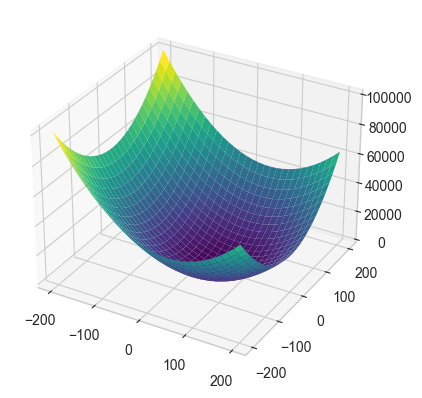

In [273]:
def fct1(x, y):
    f = func1(np.array([x, y]))
    return f


meshx = np.linspace(-200, 200, 30)
meshy = np.linspace(-200, 200, 30)
X, Y = np.meshgrid(meshx, meshy)
Z = fct(X, Y)
fig = plt.figure(clear=True)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

Now, we will start our gradient descent algorithm.  Here, we will start at the point $P=(80, 20)$.

In [274]:
# Parâmetros do algoritmo
initial_point = [80, 20]  # Ponto inicial (pode ser alterado)
learning_rate = 0.01
optimal, trajectory = gradient_descent1(gradf, initial_point, learning_rate=learning_rate)

print(f"Ponto ótimo encontrado: {optimal}")
print(f"Valor mínimo da função: {f(optimal)}")

Ponto ótimo encontrado: [47.00004278  0.1000258 ]
Valor mínimo da função: 1937.2138211328854


We can plot the $(x,y)$ points from our algorithm as well.  First, we create a dataframe with all of the points from the xyValuesList.

In [275]:
#TODO: implement this part of code

We will plot these point on a contour diagram to see how they move toward the minimum of $f$.

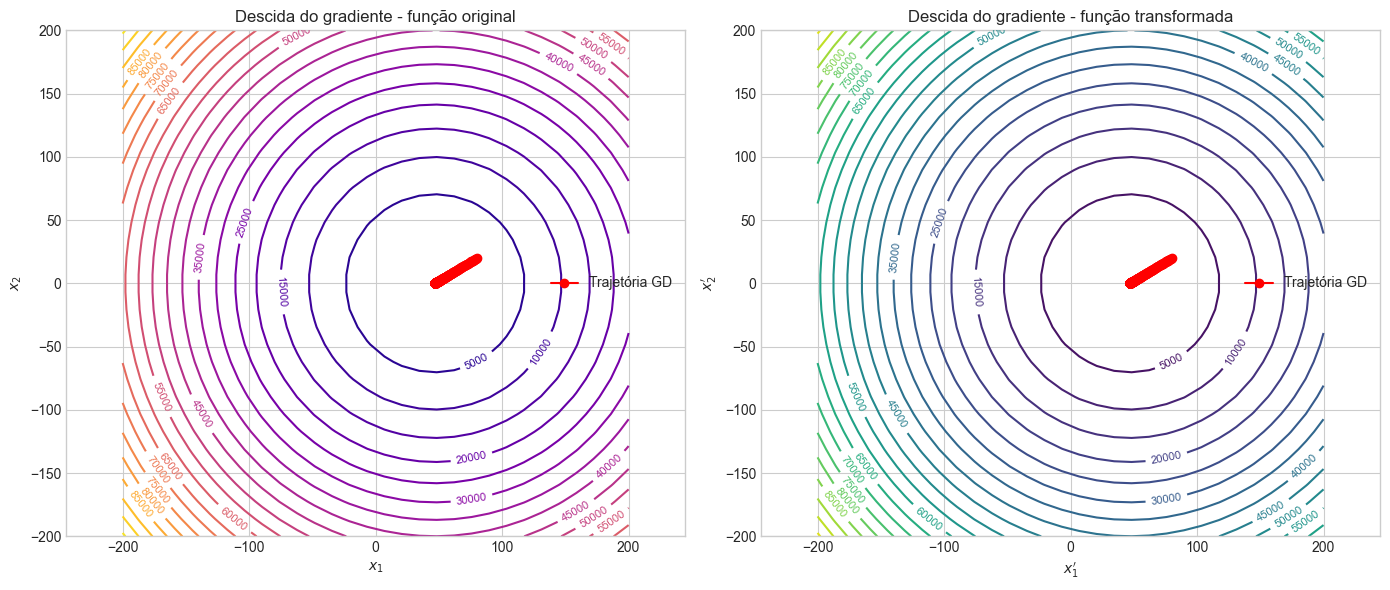

In [276]:
# Curvas de nível para plotagem

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6),clear=True)

# Original
cs1 = axs[0].contour(X, Y, Z, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# Transformada
cs2 = axs[1].contour(X, Y, Z, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - função transformada")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Finding the Optimal Step Size for Gradient Descent

### Symbolic Calculation of Optimal Step Size

We want to find the optimal step size $\alpha$ for a single gradient descent step from our starting point $\mathbf{x}_0 = (80, 20)$. We use symbolic mathematics to derive an exact solution.

First, we define our objective function:
$$f(\mathbf{x}) = (x - 47)^2 + (y - 0.1)^2 + 2$$

The gradient of this function is:
$$\nabla f(\mathbf{x}) = \begin{pmatrix} 2(x - 47) \\ 2(y - 0.1) \end{pmatrix}$$

For our starting point $\mathbf{x}_0 = (80, 20)$, the gradient is:
$$\nabla f(\mathbf{x}_0) = \begin{pmatrix} 2(80 - 47) \\ 2(20 - 0.1) \end{pmatrix} = \begin{pmatrix} 66 \\ 39.8 \end{pmatrix}$$

The next point in gradient descent is given by:
$$\mathbf{x}_1 = \mathbf{x}_0 - \alpha \nabla f(\mathbf{x}_0)$$

Substituting our values:
$$\mathbf{x}_1 = \begin{pmatrix} 80 \\ 20 \end{pmatrix} - \alpha \begin{pmatrix} 66 \\ 39.8 \end{pmatrix} = \begin{pmatrix} 80 - 66\alpha \\ 20 - 39.8\alpha \end{pmatrix}$$

Now we define a function $\phi(\alpha)$ which is our objective function evaluated at $\mathbf{x}_1$:
$$\phi(\alpha) = f(\mathbf{x}_1) = (80 - 66\alpha - 47)^2 + (20 - 39.8\alpha - 0.1)^2 + 2$$

Simplifying:
$$\phi(\alpha) = (33 - 66\alpha)^2 + (19.9 - 39.8\alpha)^2 + 2$$

To find the optimal $\alpha$, we take the derivative of $\phi(\alpha)$ with respect to $\alpha$ and set it to zero:
$$\frac{d\phi}{d\alpha} = -2 \cdot 66 \cdot (33 - 66\alpha) - 2 \cdot 39.8 \cdot (19.9 - 39.8\alpha) = 0$$

Simplifying:
$$-132(33 - 66\alpha) - 79.6(19.9 - 39.8\alpha) = 0$$
$$-4356 + 8712\alpha - 1584.04 + 3168.08\alpha = 0$$
$$11880.08\alpha = 5940.04$$
$$\alpha = 0.5$$

Therefore, the optimal step size for the first iteration of gradient descent is 0.5.

### creating a function that perform the GD algorithm

#### implement the GD algorithm, with options to fixed alpha, backtracking line search (Armijo and Wolfe Conditions)

In [277]:
def gradient_descent(f, grad_f, x0, alpha_type='fixed', alpha=0.01, 
                     max_steps=1000, tolerance=0.0001, 
                     c1=1e-4, rho=0.5, max_line_search_iter=20):
    """
    Gradient descent optimization algorithm.
    
    Parameters:
    -----------
    f : function
        The objective function to minimize, should take a numpy array as input.
    grad_f : function
        The gradient of the objective function, should take a numpy array as input.
    x0 : numpy array
        The starting point.
    alpha_type : str, optional
        Type of step size: 'fixed' or 'backtracking'. Default is 'fixed'.
    alpha : float, optional
        Step size for fixed alpha. Default is 0.01.
    max_steps : int, optional
        Maximum number of iterations. Default is 1000.
    tolerance : float, optional
        Convergence tolerance based on the norm of the difference. Default is 0.0001.
    c1 : float, optional
        Parameter for the Armijo condition in backtracking line search. Default is 1e-4.
    rho : float, optional
        Step size reduction factor for backtracking line search. Default is 0.5.
    max_line_search_iter : int, optional
        Maximum number of backtracking iterations. Default is 20.
        
    Returns:
    --------
    X : numpy array
        The final solution point.
    f_values : list
        Function values at each iteration.
    path : list of numpy arrays
        The path taken by the algorithm.
    num_steps : int
        Number of steps taken to converge.
    """
    #TODO: implement this part of code
    
    return 

In [278]:
# Example usage:
# Define your function and its gradient
def f_example(X):
    x, y = X
    return (x-47)**2 + (y-0.1)**2 + 2

def grad_f_example(X):
    x, y = X
    return np.array([2*(x-47), 2*(y-0.1)])

#TODO: implement this part of code

#### show the results of your method for following cases:

- $$f(x) = \sum_{i=1}^{n-1}[100(x_{i+1}-x_i^2)^2+(1-x_i)^2], n = 5$$

- $$ f(x,y) = (x+2y-7)^2 + (2x+y-5)^2 $$

- $$ f(x,y) = (x^2 + y - 11)^2 + (x+y^2-7)^2 $$

- $$ f(x,y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

- $$ f(x,y) = sin(x+y) + (x-y)^2 - 1.5x + 2.5y + 1 $$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

In [279]:
#Function to calculate Gradient of given function
#Using Forward Difference Method
def grad(x):                    
    value = np.zeros(len(x))    
    xd = x.copy()
    h = 10**-6
    for j in range(len(x)):
        xd[j] = x[j] + h
        value[j] = (func(xd) - func(x))/h
        xd = x.copy()
    return value
 
#Function for calculating Function Value 
def func(x):                     
    return 20*(x[1] - x[0]**2)**2 + (1 - x[0])**2

result = gradient_descent(func, grad, [0, 0], alpha_type='fixed', alpha=0.01)
#plot_convergence_path(func, result[2], "Gradient Descent with Fixed Alpha=0.01", x_range = [-2,2], y_range = [-2,2])

In [280]:
result = gradient_descent(func, grad, [0, 0], alpha_type='backtracking', alpha=1.0)
#plot_convergence_path(func, result[2], "Gradient Descent with backtracking", x_range = [-2,2], y_range = [-2,2])

#### Results for the function below:

- $$ f(x,y) = (x+2y-7)^2 + (2x+y-5)^2 $$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

In [325]:
def func2(x):                     
    return (x[0] + 2*x[1] -7)**2 + (2*x[0] + x[1] -5)**2



In [326]:
def grad_func2(x):                     
     return np.array([(6*x[0]+ 8*x[1] - 34), (8*x[0] + 12*x[1] - 48)])



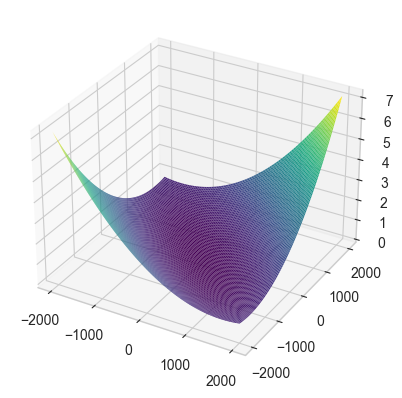

In [336]:
def fct2(x, y):
    f = func2(np.array([x, y]))
    return f


meshx = np.linspace(-2000, 2000, 100)
meshy = np.linspace(-2000, 2000, 100)
X, Y = np.meshgrid(meshx, meshy)
Z = fct2(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')


In [341]:
def armijo_line_search(f, grad_f, x, p, alpha0=1.0, rho=0.5, c=1e-4, max_iter=50):
    """
    Busca de linha por backtracking usando a condição de Armijo.
    
    Parâmetros:
      f       : função objetivo (recebe um vetor e retorna um escalar)
      grad_f  : função de gradiente de f (recebe um vetor e retorna um vetor)
      x       : ponto atual (array numpy)
      p       : direção de descida (array numpy)
      alpha0  : valor inicial do tamanho do passo
      rho     : fator de redução (0 < rho < 1)
      c       : parâmetro de Armijo (0 < c < 1)
      max_iter: número máximo de iterações para ajustar o tamanho do passo
      
    Retorna:
      alpha   : tamanho do passo que satisfaz a condição de Armijo.
    """
    alpha = alpha0
    fx = f(x)
    grad_fx = grad_f(x)
    for i in range(max_iter):
        if f(x + alpha * p) <= fx + c * alpha * np.dot(grad_fx, p):
            return alpha
        alpha *= rho
    return alpha

def zoom(x, p, f, grad_f, alpha_lo, alpha_hi, f0, grad0, c1, c2, max_iter_zoom=50):
    """
    Fase de refinamento para a condição de Wolfe.
    
    Procura um valor α entre alpha_lo e alpha_hi que satisfaça as condições fortes de Wolfe.
    """
    for i in range(max_iter_zoom):
        alpha = (alpha_lo + alpha_hi) / 2.0
        f_alpha = f(x + alpha * p)
        f_alpha_lo = f(x + alpha_lo * p)
        # Verifica condição de Armijo ou se f(α) não diminui suficientemente
        if f_alpha > f0 + c1 * alpha * grad0 or f_alpha >= f_alpha_lo:
            alpha_hi = alpha
        else:
            grad_alpha = np.dot(grad_f(x + alpha * p), p)
            # Condição de curvatura forte de Wolfe: |g(α)^Tp| <= -c2 * g(0)^T p
            if abs(grad_alpha) <= -c2 * grad0:
                return alpha
            # Se o gradiente indicar que o mínimo foi ultrapassado, reduza o intervalo
            if grad_alpha * (alpha_hi - alpha_lo) >= 0:
                alpha_hi = alpha_lo
            alpha_lo = alpha
    return alpha

def wolfe_line_search(f, grad_f, x, p, alpha0=1.0, c1=1e-4, c2=0.9, max_iter=50):
    """
    Busca de linha que satisfaz as condições fortes de Wolfe.
    
    Parâmetros:
      f       : função objetivo
      grad_f  : gradiente de f
      x       : ponto atual (array numpy)
      p       : direção de descida (array numpy)
      alpha0  : valor inicial para o tamanho do passo
      c1      : parâmetro para a condição de Armijo
      c2      : parâmetro para a condição de curvatura (0 < c1 < c2 < 1, típico c2=0.9)
      max_iter: número máximo de iterações para a busca de linha
      
    Retorna:
      alpha   : passo que satisfaz as condições fortes de Wolfe.
    """
    alpha = alpha0
    alpha_prev = 0
    f0 = f(x)
    grad0 = np.dot(grad_f(x), p)
    
    for i in range(max_iter):
        f_alpha = f(x + alpha * p)
        if (f_alpha > f0 + c1 * alpha * grad0) or (i > 0 and f_alpha >= f(x + alpha_prev * p)):
            return zoom(x, p, f, grad_f, alpha_prev, alpha, f0, grad0, c1, c2)
        
        grad_alpha = np.dot(grad_f(x + alpha * p), p)
        if abs(grad_alpha) <= -c2 * grad0:
            return alpha
        
        if grad_alpha >= 0:
            return zoom(x, p, f, grad_f, alpha, alpha_prev, f0, grad0, c1, c2)
        
        alpha_prev = alpha
        alpha *= 2.0  # Se as condições ainda não são satisfeitas, aumenta-se o tamanho do passo
    return alpha

def gradient_descent3(f, grad_f, x0, line_search_method="armijo", max_iter=1000, tol=1e-6, **kwargs):
    """
    Otimização pelo método de gradiente descendente com busca de linha.
    
    Permite escolher entre duas estratégias de busca de linha:
      - "armijo": Busca de linha por backtracking com a condição de Armijo
      - "wolfe" : Busca de linha que satisfaz as condições fortes de Wolfe
      
    Parâmetros:
      f        : função a ser minimizada (recebe um vetor e retorna um escalar)
      grad_f   : gradiente da função f (recebe um vetor e retorna um vetor)
      x0       : ponto inicial (array numpy)
      line_search_method:
                 opção de busca de linha ("armijo" ou "wolfe")
      max_iter : número máximo de iterações do algoritmo de gradiente descendente
      tol      : tolerância para o critério de parada baseado na norma do gradiente
      kwargs   : parâmetros adicionais para as funções de busca de linha (ex. alpha0, rho, c, c1, c2)
      
    Retorna:
      x        : vetor que minimiza a função (ponto ótimo)
      f(x)     : valor da função no ponto ótimo
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]  # Armazena os pontos percorridos
    
    for i in range(max_iter):
        grad = grad_f(x)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tol:
            print(f"Convergência atingida na iteração {i} com ||grad|| = {grad_norm:.2e}.")
            break
        p = -grad  # direção de descida
        if line_search_method.lower() == "armijo":
            alpha = armijo_line_search(f, grad_f, x, p, **kwargs)
        elif line_search_method.lower() == "wolfe":
            alpha = wolfe_line_search(f, grad_f, x, p, **kwargs)
        else:
            raise ValueError("Método de busca de linha não suportado. Escolha 'armijo' ou 'wolfe'.")
        x = x + alpha * p  # atualização: novo ponto
        trajectory.append(x.copy())
    return x, f(x), np.array(trajectory)

# Exemplo de uso:
if __name__ == "__main__":
    # Define uma função quadrática simples e seu gradiente.
    # Exemplo: f(x) = (x0 - 3)² + (x1 + 1)² -> mínimo em (3, -1)
    def f(x):
        return (x[0] - 3)**2 + (x[1] + 1)**2
    
    def grad_f(x):
        return np.array([2 * (x[0] - 3), 2 * (x[1] + 1)])
    
    # Ponto inicial
    x0 = np.array([0.0, 0.0])
    
    # Usando busca de linha com Armijo (backtracking)
    x_opt_armijo, f_opt_armijo , t = gradient_descent3(f, grad_f, x0, line_search_method="armijo", max_iter=1000, tol=1e-6,alpha0=0.15, rho=0.5, c=1e-4)
    print("Método Armijo:")
    print("Ponto ótimo:", x_opt_armijo)
    print("Valor da função no ótimo:", f_opt_armijo)
    
    # Usando busca de linha com condições de Wolfe
    x_opt_wolfe, f_opt_wolfe, t = gradient_descent3(f, grad_f, x0,line_search_method="wolfe",max_iter=1000, tol=1e-6, alpha0=0.15, c1=1e-4, c2=0.9)
    print("\nMétodo Wolfe:")
    print("Ponto ótimo:", x_opt_wolfe)
    print("Valor da função no ótimo:", f_opt_wolfe)
  

Convergência atingida na iteração 44 com ||grad|| = 9.67e-07.
Método Armijo:
Ponto ótimo: [ 2.99999954 -0.99999985]
Valor da função no ótimo: 2.336832162123924e-13
Convergência atingida na iteração 44 com ||grad|| = 9.67e-07.

Método Wolfe:
Ponto ótimo: [ 2.99999954 -0.99999985]
Valor da função no ótimo: 2.336832162123924e-13


In [342]:
initial_point2 = [200, 200]  # Ponto inicial (pode ser alterado)
learning_rate = 0.01
optimal, trajectory = gradient_descent1(grad_func2, initial_point2, learning_rate=learning_rate)

print(f"Ponto ótimo encontrado: {optimal}")
print(f"Valor mínimo da função: {func2(optimal)}")
x0=initial_point2

x_opt_armijo, f_opt_armijo , tarmijo = gradient_descent3(func2, grad_func2, x0, line_search_method="armijo",max_iter=1000, tol=1e-6, alpha0=0.01, rho=0.5, c=1e-4)
print("Método Armijo:")
print("Ponto ótimo:", x_opt_armijo)
print("Valor da função no ótimo:", f_opt_armijo)
   
# Usando busca de linha com condições de Wolfe
x_opt_wolfe, f_opt_wolfe, twolfe = gradient_descent3(func2, grad_func2, x0,line_search_method="wolfe",max_iter=1000, tol=1e-6, alpha0=0.01, c1=1e-4, c2=0.9)
print("\nMétodo Wolfe:")
print("Ponto ótimo:", x_opt_wolfe)
print("Valor da função no ótimo:", f_opt_wolfe)

Ponto ótimo encontrado: [3.41818487 1.71019769]
Valor mínimo da função: 12.60419684958277
Método Armijo:
Ponto ótimo: [3.41818487 1.71019769]
Valor da função no ótimo: 12.60419684958277
Convergência atingida na iteração 306 com ||grad|| = 9.72e-07.

Método Wolfe:
Ponto ótimo: [3.00000154 1.9999989 ]
Valor da função no ótimo: 9.00001188633588


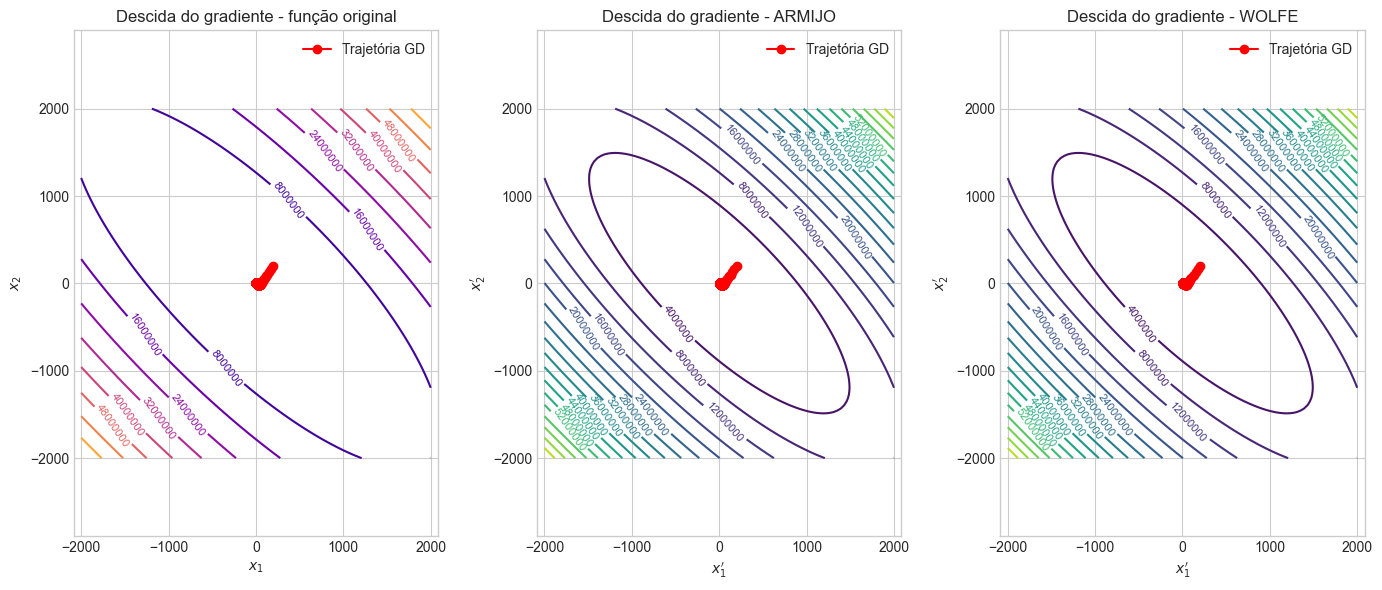

In [333]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(14, 6),clear=True)

# Original
cs1 = axs[0].contour(X, Y, Z, levels=10, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# # GRAFICO COM CURVAS DE NIVEL E TRAJETORIA O METODO DE ARMIJO
cs2 = axs[1].contour(X, Y, Z, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(tarmijo[:, 0], tarmijo[:, 1], 'ro-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - ARMIJO")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

# GRAFICO COM CURVAS DE NIVEL E TRAJETORIA PARA O METODO DE WOLFE
cs3 = axs[2].contour(X, Y, Z, levels=20, cmap='viridis')
axs[2].clabel(cs3, inline=True, fontsize=8)
axs[2].plot(twolfe[:, 0], twolfe[:, 1], 'ro-', label='Trajetória GD')
axs[2].set_title("Descida do gradiente - WOLFE")
axs[2].set_xlabel("$x_1'$")
axs[2].set_ylabel("$x_2'$")
axs[2].legend()
axs[2].axis('equal')
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### Results of your method for function:

- $$ f(x,y) = (x^2 + y - 11)^2 + (x+y^2-7)^2 $$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

In [287]:
def func3(x):                     
    return (x[0]**2 + x[1] -11)**2 + (x[0] + x[1]**2 -7)**2


In [288]:
def grad_func3(x):                     
     return np.array([4*x[0]*(x[0]**2 + x[1] -11) + 2*(x[0]+x[1]**2 -7), 2*(x[0]**2 + x[1] -11) + 4*x[1]*(x[0]+x[1]**2 -7)])

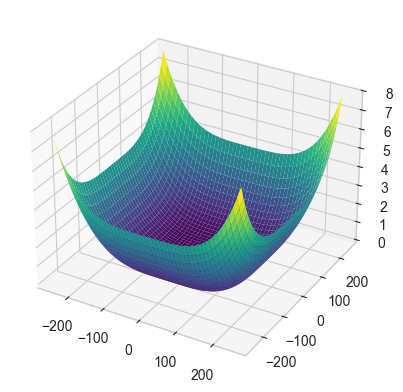

In [316]:
def fct3(x, y):
    f = func3(np.array([x, y]))
    return f


meshx = np.linspace(-250, 250, 50)
meshy = np.linspace(-250, 250, 50)
X, Y = np.meshgrid(meshx, meshy)
Z = fct3(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

In [317]:
initial_point2 = [200, 200]  # Ponto inicial (pode ser alterado)
learning_rate = 0.05
optimal, trajectory = gradient_descent1(grad_func3, initial_point2, learning_rate, tol=1e-6, max_iter=1000)

print(f"Ponto ótimo encontrado: {optimal}")
print(f"Valor mínimo da função: {func2(optimal)}")

x0=initial_point2

x_opt_armijo, f_opt_armijo , tarmijo = gradient_descent3(func3, grad_func3, x0, line_search_method="armijo",max_iter=1000, tol=1e-6, alpha0=0.001, rho=0.5, c=1e-4)
print("Método Armijo:")
print("Ponto ótimo:", x_opt_armijo)
print("Valor da função no ótimo:", f_opt_armijo)
   
# Usando busca de linha com condições de Wolfe
x_opt_wolfe, f_opt_wolfe, twolfe = gradient_descent3(func3, grad_func3, x0,line_search_method="wolfe",max_iter=1000, tol=1e-6, alpha0=0.001, c1=1e-4, c2=0.9)
print("\nMétodo Wolfe:")
print("Ponto ótimo:", x_opt_wolfe)
print("Valor da função no ótimo:", f_opt_wolfe)

Ponto ótimo encontrado: [nan nan]
Valor mínimo da função: nan
Convergência atingida na iteração 879 com ||grad|| = 9.96e-07.
Método Armijo:
Ponto ótimo: [3.00000001 1.99999996]
Valor da função no ótimo: 1.9296385082900352e-14
Convergência atingida na iteração 143 com ||grad|| = 9.84e-07.

Método Wolfe:
Ponto ótimo: [3.00000001 1.99999996]
Valor da função no ótimo: 1.880991991566431e-14


C:\Users\sabreu\AppData\Local\Temp\ipykernel_31556\3627838878.py:2: RuntimeWarning: overflow encountered in scalar power
  return np.array([4*x[0]*(x[0]**2 + x[1] -11) + 2*(x[0]+x[1]**2 -7), 2*(x[0]**2 + x[1] -11) + 4*x[1]*(x[0]+x[1]**2 -7)])
C:\Users\sabreu\AppData\Local\Temp\ipykernel_31556\3627838878.py:2: RuntimeWarning: invalid value encountered in scalar add
  return np.array([4*x[0]*(x[0]**2 + x[1] -11) + 2*(x[0]+x[1]**2 -7), 2*(x[0]**2 + x[1] -11) + 4*x[1]*(x[0]+x[1]**2 -7)])


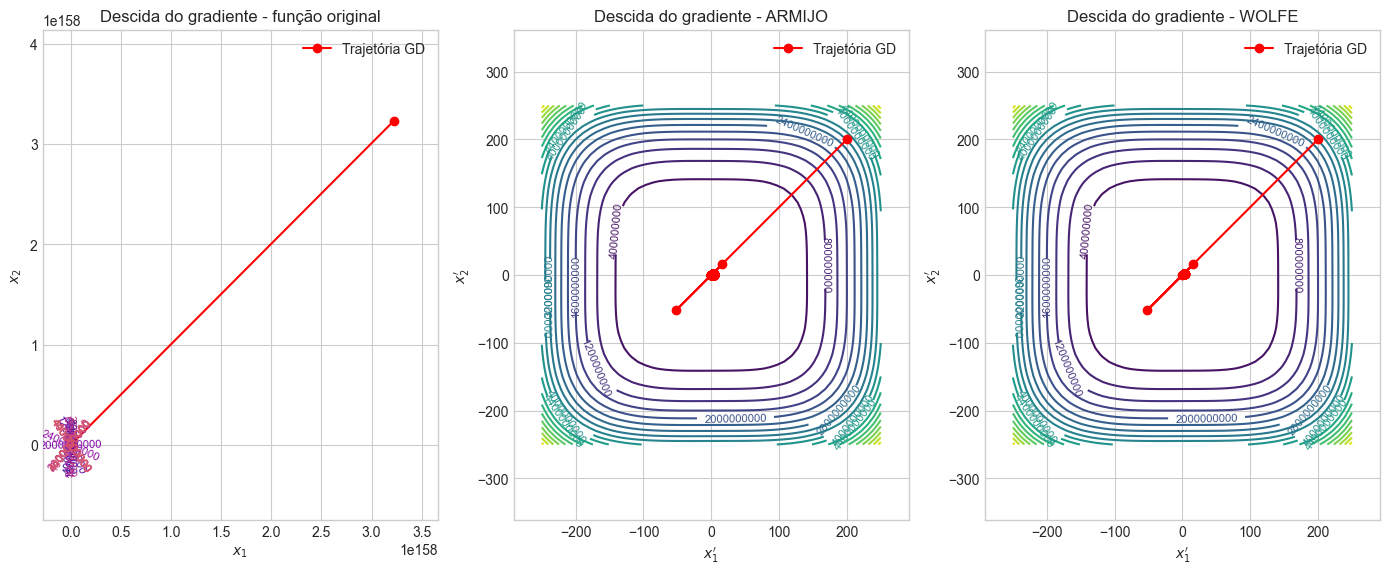

In [318]:
# Curvas de nível para plotagem

# Plot
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# # GRAFICO COM CURVAS DE NIVEL E TRAJETORIA O METODO DE ARMIJO
cs2 = axs[1].contour(X, Y, Z, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(tarmijo[:, 0], tarmijo[:, 1], 'ro-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - ARMIJO")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

# GRAFICO COM CURVAS DE NIVEL E TRAJETORIA PARA O METODO DE WOLFE
cs3 = axs[2].contour(X, Y, Z, levels=20, cmap='viridis')
axs[2].clabel(cs3, inline=True, fontsize=8)
axs[2].plot(twolfe[:, 0], twolfe[:, 1], 'ro-', label='Trajetória GD')
axs[2].set_title("Descida do gradiente - WOLFE")
axs[2].set_xlabel("$x_1'$")
axs[2].set_ylabel("$x_2'$")
axs[2].legend()
axs[2].axis('equal')
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### Results for the function:

- $$ f(x,y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

In [292]:
def func4(x):                     
    return (2*x[0]**2 -1.05*x[0]**4 + (x[0]**6)/6 + x[0]*x[1] + x[1]**2)

In [293]:
def grad_func4(x):                     
     return np.array([4*x[0] - 4.02*4*x[0]**3 + x[0]**5 + x[1], x[0] + 2*x[1]])

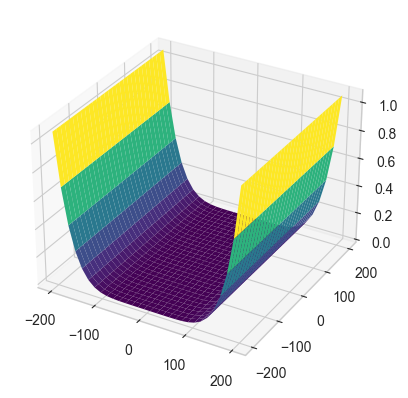

In [304]:
def fct4(x, y):
    f = func4(np.array([x, y]))
    return f


meshx = np.linspace(-200, 200, 30)
meshy = np.linspace(-200, 200, 30)
X, Y = np.meshgrid(meshx, meshy)
Z = fct4(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [307]:
initial_point2 = [50, 50]  # Ponto inicial (pode ser alterado)
learning_rate = 0.01
optimal, trajectory = gradient_descent1(grad_func4, initial_point2, learning_rate, tol=1e-6, max_iter=1000)

print(f"Ponto ótimo encontrado: {optimal}")
print(f"Valor mínimo da função: {func4(optimal)}")

x0=initial_point2

x_opt_armijo, f_opt_armijo , tarmijo = gradient_descent3(func4, grad_func4, x0, line_search_method="armijo",max_iter=1000, tol=1e-6, alpha0=0.001, rho=0.5, c=1e-4)
print("Método Armijo:")
print("Ponto ótimo:", x_opt_armijo)
print("Valor da função no ótimo:", f_opt_armijo)
   
# Usando busca de linha com condições de Wolfe
x_opt_wolfe, f_opt_wolfe, twolfe = gradient_descent3(func4, grad_func4, x0,line_search_method="wolfe",max_iter=1000, tol=1e-6, alpha0=0.001, c1=1e-4, c2=0.9)
print("\nMétodo Wolfe:")
print("Ponto ótimo:", x_opt_wolfe)
print("Valor da função no ótimo:", f_opt_wolfe)

C:\Users\sabreu\AppData\Local\Temp\ipykernel_31556\3243088891.py:2: RuntimeWarning: overflow encountered in scalar power
  return np.array([4*x[0] - 4.02*4*x[0]**3 + x[0]**5 + x[1], x[0] + 2*x[1]])
C:\Users\sabreu\AppData\Local\Temp\ipykernel_31556\3243088891.py:2: RuntimeWarning: invalid value encountered in scalar add
  return np.array([4*x[0] - 4.02*4*x[0]**3 + x[0]**5 + x[1], x[0] + 2*x[1]])


Ponto ótimo encontrado: [nan nan]
Valor mínimo da função: nan
Método Armijo:
Ponto ótimo: [-2.75144969 44.03142846]
Valor da função no ótimo: 1844.8929845134458

Método Wolfe:
Ponto ótimo: [-3.31222563 36.22700337]
Valor da função no ótimo: 1308.041919881647


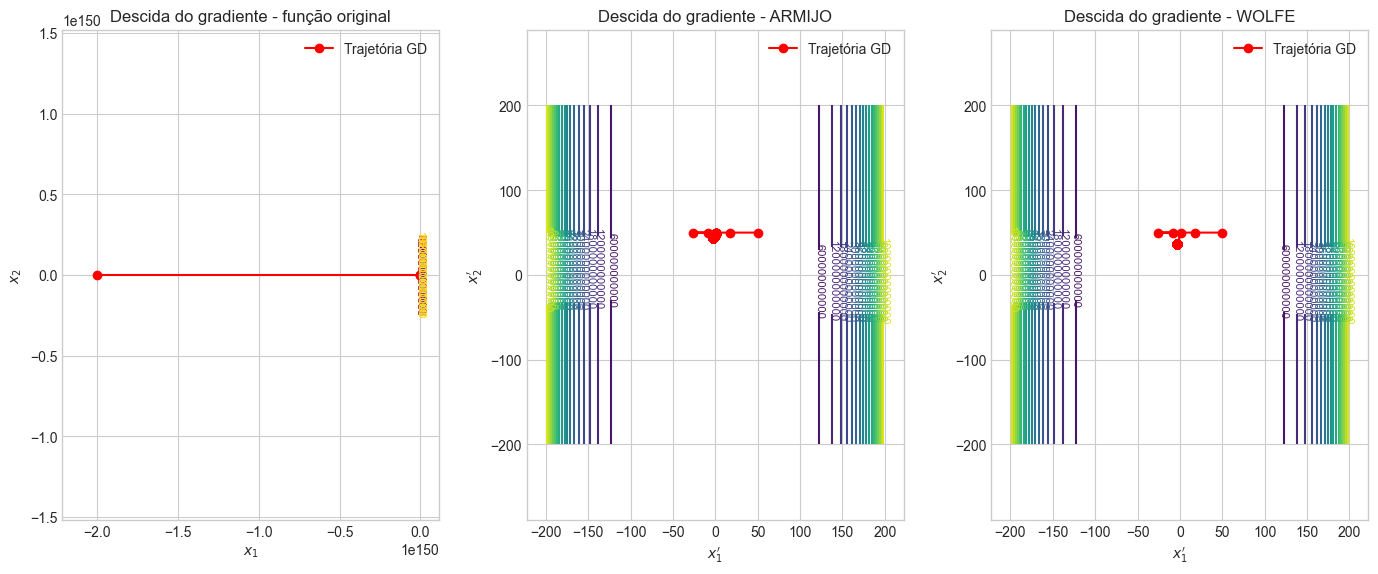

In [308]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# # GRAFICO COM CURVAS DE NIVEL E TRAJETORIA O METODO DE ARMIJO
cs2 = axs[1].contour(X, Y, Z, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(tarmijo[:, 0], tarmijo[:, 1], 'ro-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - ARMIJO")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

# GRAFICO COM CURVAS DE NIVEL E TRAJETORIA PARA O METODO DE WOLFE
cs2 = axs[2].contour(X, Y, Z, levels=20, cmap='viridis')
axs[2].clabel(cs2, inline=True, fontsize=8)
axs[2].plot(twolfe[:, 0], twolfe[:, 1], 'ro-', label='Trajetória GD')
axs[2].set_title("Descida do gradiente - WOLFE")
axs[2].set_xlabel("$x_1'$")
axs[2].set_ylabel("$x_2'$")
axs[2].legend()
axs[2].axis('equal')
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### Results for the function:

- $$ f(x,y) = sin(x+y) + (x-y)^2 - 1.5x + 2.5y + 1 $$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

In [309]:
def func5(x):                     
    return (np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5*x[0] + 2.5*x[1] + 1.0)

In [310]:
def grad_func5(x):                     
     return np.array([np.cos(x[0] + x[1]) + 2*(x[0] - x[1]) - 1.5, np.cos(x[0] + x[1]) - 2*(x[0] - x[1]) +2.5])

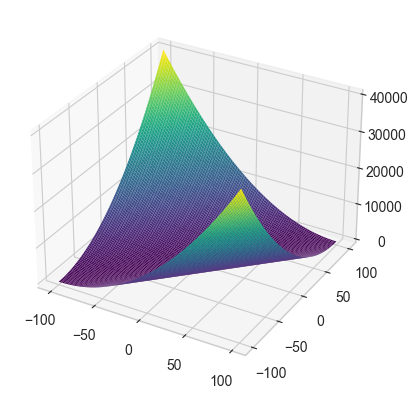

In [311]:
def fct5(x, y):
    f = func5(np.array([x, y]))
    return f


meshx = np.linspace(-100, 100, 100)
meshy = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(meshx, meshy)
Z = fct5(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [312]:
initial_point5 = [-70, 100]  # Ponto inicial (pode ser alterado)
learning_rate = 0.05
optimal, trajectory = gradient_descent1(grad_func5, initial_point5, learning_rate, tol=1e-6, max_iter=1000)

print(f"Ponto ótimo encontrado: {optimal}")
print(f"Valor mínimo da função: {func5(optimal)}")

x0=initial_point5

x_opt_armijo, f_opt_armijo , tarmijo = gradient_descent3(func5, grad_func5, x0, line_search_method="armijo",max_iter=1000, tol=1e-6, alpha0=0.001, rho=0.5, c=1e-4)
print("Método Armijo:")
print("Ponto ótimo:", x_opt_armijo)
print("Valor da função no ótimo:", f_opt_armijo)
   
# Usando busca de linha com condições de Wolfe
x_opt_wolfe, f_opt_wolfe, twolfe = gradient_descent3(func5, grad_func5, x0,line_search_method="wolfe",max_iter=1000, tol=1e-6, alpha0=0.001, c1=1e-4, c2=0.9)
print("\nMétodo Wolfe:")
print("Ponto ótimo:", x_opt_wolfe)
print("Valor da função no ótimo:", f_opt_wolfe)

Ponto ótimo encontrado: [15.16077363 14.16077363]
Valor mínimo da função: 13.794740313076431
Método Armijo:
Ponto ótimo: [13.66061274 15.76756467]
Valor da função no ótimo: 23.452911776059352

Método Wolfe:
Ponto ótimo: [15.16076658 14.16076658]
Valor da função no ótimo: 13.794740312969207


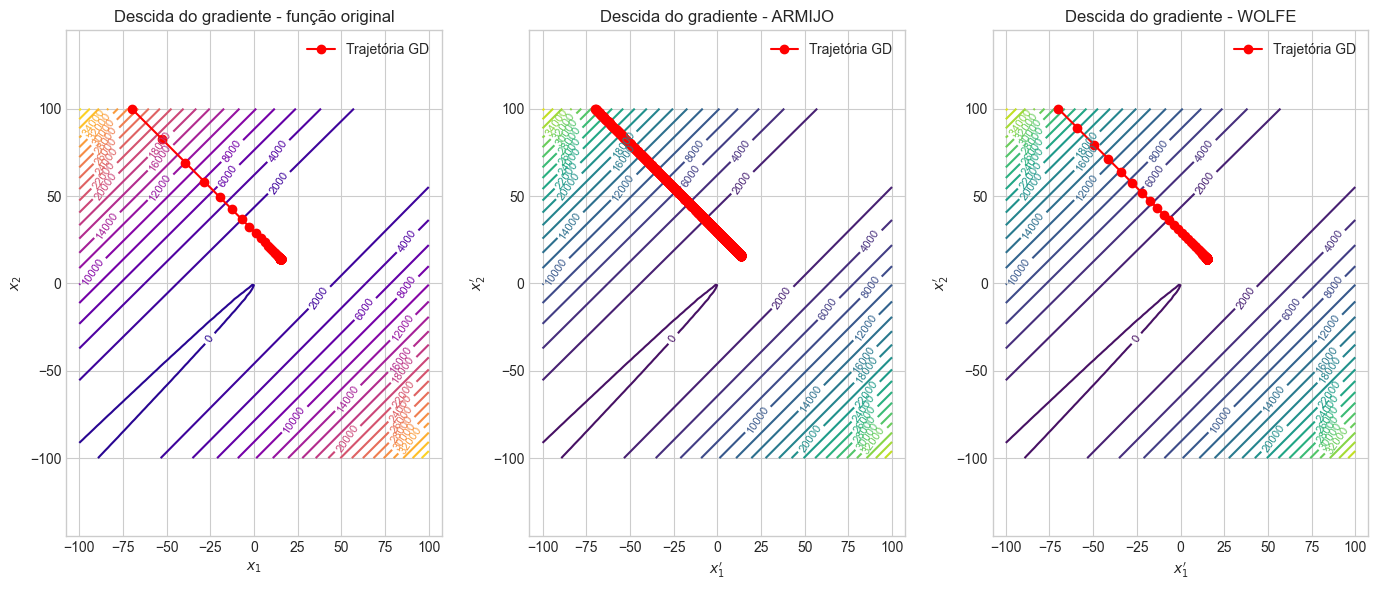

In [313]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# # GRAFICO COM CURVAS DE NIVEL E TRAJETORIA O METODO DE ARMIJO
cs2 = axs[1].contour(X, Y, Z, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(tarmijo[:, 0], tarmijo[:, 1], 'ro-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - ARMIJO")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

# GRAFICO COM CURVAS DE NIVEL E TRAJETORIA PARA O METODO DE WOLFE
cs2 = axs[2].contour(X, Y, Z, levels=20, cmap='viridis')
axs[2].clabel(cs2, inline=True, fontsize=8)
axs[2].plot(twolfe[:, 0], twolfe[:, 1], 'ro-', label='Trajetória GD')
axs[2].set_title("Descida do gradiente - WOLFE")
axs[2].set_xlabel("$x_1'$")
axs[2].set_ylabel("$x_2'$")
axs[2].legend()
axs[2].axis('equal')
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### Results for the function:

- $$f(x) = \sum_{i=1}^{n-1}[100(x_{i+1}-x_i^2)^2+(1-x_i)^2], n = 5$$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

In [314]:
def rosenbrock_5d(x):
    """
    Calcula a função Rosenbrock para um vetor x de dimensão 5.
    
    A função é definida por:
    
        f(x) = sum_{i=0}^{3} [ 100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 ]
    
    Parâmetros:
        x (array_like): Vetor de entrada com 5 elementos.
        
    Retorna:
        float: Valor da função Rosenbrock em x.
    """
    if len(x) != 5:
        raise ValueError("O vetor de entrada deve ter dimensão 5.")
    
    f_val = 0.0
    for i in range(4):
        f_val += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return f_val

def grad_rosenbrock_5d(x):
    """
    Calcula o gradiente da função Rosenbrock para um vetor x de dimensão 5.
    
    A função Rosenbrock é definida por:
    
        f(x) = sum_{i=0}^{3} [ 100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 ]
    
    As derivadas são:
    
        Para i = 0:
            grad[0] = -400*x[0]*(x[1] - x[0]**2) + 2*(x[0]-1)
            
        Para i = 1, 2, 3:
            grad[i] = 200*(x[i] - x[i-1]**2) - 400*x[i]*(x[i+1] - x[i]**2) + 2*(x[i]-1)
            
        Para i = 4:
            grad[4] = 200*(x[4]- x[3]**2)
    
    Parâmetros:
        x (array_like): Vetor de entrada com 5 elementos.
    
    Retorna:
        numpy.ndarray: Vetor com o gradiente, de dimensão 5.
    """
    if len(x) != 5:
        raise ValueError("O vetor de entrada deve ter dimensão 5.")
    
    grad = np.zeros_like(x)
    
    # Componente 0
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) + 2*(x[0]-1)
    
    # Componentes 1 a 3
    for i in range(1, 4):
        grad[i] = 200*(x[i] - x[i-1]**2) - 400*x[i]*(x[i+1] - x[i]**2) + 2*(x[i]-1)
    
    # Componente 4
    grad[4] = 200*(x[4]- x[3]**2)
    
    return grad

In [315]:
initial_point6 = [-5, 3, 0, 0, 1.0]  # Ponto inicial (pode ser alterado)
learning_rate = 0.05
optimal, trajectory = gradient_descent1(rosenbrock_5d, initial_point6, learning_rate, tol=1e-6, max_iter=1000)

xmin = [1.0, 1.0, 1.0, 1.0, 1.0]
xlocalmin = [-1.0, 1.0, 1.0, 1.0, 1.0]
fmin=rosenbrock_5d(xmin)
flocalmin=rosenbrock_5d(xlocalmin)
print(f"Valor mínimo GLOBAL da função: {fmin}")
print(f"Valor mínimo LOCAL da função: {flocalmin}")
print(f"Ponto x ótimo encontrado grad textbook: {optimal}")
print(f"Valor f mínimo encontrado da função para grad textbook: {rosenbrock_5d(optimal)}")

x0=initial_point6

x_opt_armijo, f_opt_armijo , tarmijo = gradient_descent3(rosenbrock_5d, grad_rosenbrock_5d, x0, line_search_method="armijo",max_iter=1000, tol=1e-6, alpha0=0.001, rho=0.5, c=1e-4)
print("Método Armijo:")
print("Ponto ótimo:", x_opt_armijo)
print("Valor da função no ótimo:", f_opt_armijo)
   
# Usando busca de linha com condições de Wolfe
x_opt_wolfe, f_opt_wolfe, twolfe = gradient_descent3(rosenbrock_5d, grad_rosenbrock_5d, x0,line_search_method="wolfe",max_iter=1000, tol=1e-6, alpha0=0.001, c1=1e-4, c2=0.9)
print("\nMétodo Wolfe:")
print("Ponto ótimo:", x_opt_wolfe)
print("Valor da função no ótimo:", f_opt_wolfe)

Valor mínimo GLOBAL da função: 0.0
Valor mínimo LOCAL da função: 4.0
Ponto x ótimo encontrado grad textbook: [-inf -inf -inf -inf -inf]
Valor f mínimo encontrado da função para grad textbook: inf
Método Armijo:
Ponto ótimo: [0.94782716 0.89825367 0.80653032 0.64969875 0.42002842]
Valor da função no ótimo: 0.17372360696394262

Método Wolfe:
Ponto ótimo: [0.98382215 0.96782039 0.93657784 0.87683546 0.76819519]
Valor da função no ótimo: 0.020544197879048955


C:\Users\sabreu\AppData\Local\Temp\ipykernel_31556\1481747506.py:20: RuntimeWarning: overflow encountered in scalar power
  f_val += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
C:\Users\sabreu\AppData\Local\Temp\ipykernel_31556\3880575998.py:31: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.norm(x_new - x) < tol:
